In [ ]:
!pip install sklearn

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend

In [ ]:
from google.colab import drive
drive.mount('\content\gdrive')

In [ ]:
data = pd.read_csv('Letters_horizontal.csv').drop('Unnamed: 0', axis=1)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,letter
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,г
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,г
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,г
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,г
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,г
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7585,0,0,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ф
7586,0,0,1,2,2,0,0,0,2,1,...,0,0,2,0,0,0,0,0,0,ф
7587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ф
7588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ф


In [ ]:
# Проверим загруженный датафрейм на строчки, у которых все признаки равны нулю.
# Эти строчки удалим из таблицы.

letters_features = data.drop('letter', axis=1)

rows_to_delete = []
for row in letters_features.index:
    observation = list(letters_features.iloc[row, :])
    all_zeros = 1
    for index, element in enumerate(observation):
        if element != 0:
            all_zeros = 0
    if all_zeros == 1:
        rows_to_delete.append(row)

for row in rows_to_delete:
    data = data.drop(row)
    # print(f'Строчка из таблицы с данными: {row} удаляется.', end=' ')

data.reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,letter
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,г
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,г
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,г
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,г
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,г
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,0,0,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ф
7440,0,0,1,2,2,0,0,0,2,1,...,0,0,2,0,0,0,0,0,0,ф
7441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ф
7442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ф


In [ ]:
letter_label = {'a': 0, 'б': 1, 'в': 2, 'г': 3, 'д': 4, 'е': 5, 'ё': 6, 'ж': 7,
                 'з': 8, 'и': 9, 'й': 10, 'к': 11, 'л': 12, 'м': 13, 'н': 14,
                 'о': 15, 'п': 16, 'р': 17, 'с': 18, 'т': 19, 'у': 20, 'ф': 21,
                 'х': 22, 'ц': 23, 'ч': 24, 'ш': 25, 'щ': 26, 'ъ': 27, 'ы': 28,
                 'ь': 29, 'э': 30, 'ю': 31, 'я': 32}
label_letter = {0: 'a', 1: 'б', 2: 'в', 3: 'г', 4: 'д', 5: 'е', 6: 'ё', 7: 'ж',
                 8: 'з', 9: 'и', 10: 'й', 11: 'к', 12: 'л', 13: 'м', 14: 'н',
                 15: 'о', 16: 'п', 17: 'р', 18: 'с', 19: 'т', 20: 'у', 21: 'ф',
                 22: 'х', 23: 'ц', 24: 'ч', 25: 'ш', 26: 'щ', 27: 'ъ', 28: 'ы',
                 29: 'ь', 30: 'э', 31: 'ю', 32: 'я'}

In [ ]:
data['labels'] = data['letter'].apply(lambda x: letter_label[x])

In [ ]:
letters_labels = data['labels']
letters_features = data.drop(['letter', 'labels'], axis=1)

In [ ]:
letters_features.shape

(7444, 140)

In [ ]:
# Вначале разобьем данные на обучающую и тестовую выборки:

x_train, x_test, y_train, y_test = train_test_split(letters_features, 
                                                    letters_labels,
                                                    train_size=0.7,
                                                    random_state=42,
                                                    stratify=letters_labels)


In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [ ]:
BATCH_SIZE = 64
EPOCHS = 20
NUM_CLASSES = 33
FEATURE_NUM = 140
VALIDATION_SPLIT = 0.3
VERBOSITY = 1

In [ ]:
backend.clear_session()

# Строим модель нейронной сети:
model = Sequential()
model.add(Dense(280, activation='relu', input_shape=(FEATURE_NUM, )))  # 280
model.add(Dropout(0.4))
model.add(Dense(360, activation='relu'))  # 360
model.add(Dropout(0.4))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
model.compile(
    loss=tensorflow.keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.Adam(),
    metrics=['accuracy']
)

callbacks = [
    tensorflow.keras.callbacks.ModelCheckpoint("/content/contentgdrive/MyDrive/trainHist/epoch_{epoch}.h5")
]

model_history = model.fit(
    x_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=VERBOSITY,
    validation_split=VALIDATION_SPLIT
)

In [ ]:
# строим графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, model_history.history["loss"], label="train_loss")
plt.plot(N, model_history.history["val_loss"], label="val_loss")
plt.plot(N, model_history.history["accuracy"], label="train_acc")
plt.plot(N, model_history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Keras NN)")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('/content/contentgdrive/MyDrive/Диплом/Data/train/Loss_Acc_Keras_NN_horizontal.png')

In [ ]:
print("evaluating network...")
pred = model.predict(x_test, batch_size=BATCH_SIZE)
print(classification_report(y_test.argmax(axis=1),
    pred.argmax(axis=1)))  #, target_names=lb.classes_))

In [ ]:
confusion_matrix_arr = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))

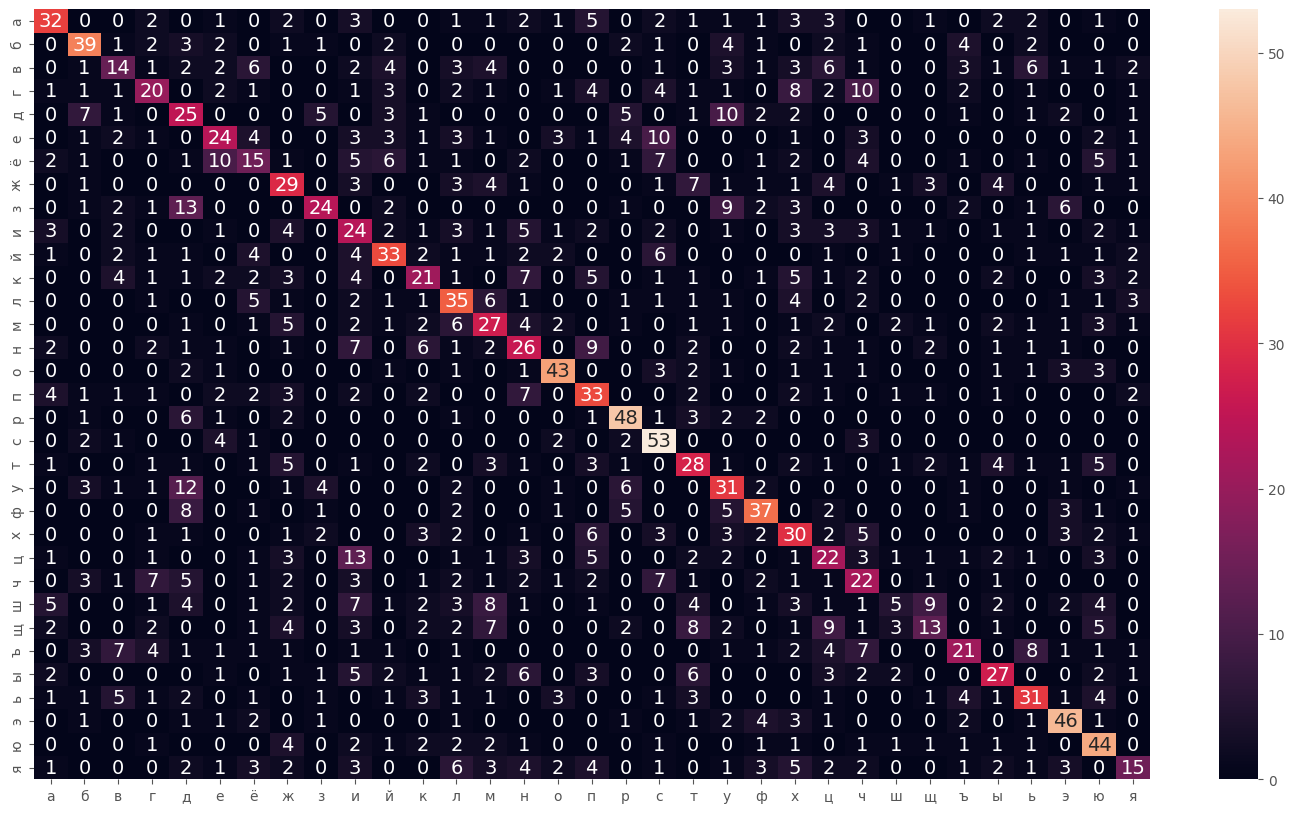

In [ ]:
# Матрица неточностей
confusion_matrix_df = pd.DataFrame(confusion_matrix_arr)

fig, ax = plt.subplots(figsize=(18,10))
sn.heatmap(confusion_matrix_df, annot=True, fmt='d', ax=ax, annot_kws={"size": 14},
           xticklabels = ['a', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й',
                          'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф',
                          'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я'],
           yticklabels = ['a', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й',
                          'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф',
                          'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я'])

plt.savefig('/content/contentgdrive/MyDrive/train/Letters_horizontal_Keras_NN.png')
plt.show()